<a href="https://colab.research.google.com/github/Yousef-Taheri/Machine-Learning-for-Medicine/blob/master/DtreeRF/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Trees and Random Forest
>The goal of the TME is to develop practical skills to use decision trees and random forest for real biological applications. We will use the [scikit-learn](http://scikit-learn.org) Python library

##Data
>•Diabetes  Remission  Prediction.   The  problem  is  to  predict  whether  a  diabetic  patient  will resolve or will not resolve his diabetes after a gastric bypass surgery.
>>1.patientsdata.txt– Observations:  200 patients, 4 clinical variables:  age of patients (continuous), HbA1C (continuous), insuline taken (categorical, yes or not), other anti-diabetic drugs are taken (categorical, yes or not)<br>2.patientsclasses.txt– Classes:  0 (Diabetes Remission) and 1 (Non-Remission) for 200 patients

In [0]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/ML_Medical/TP1'
os.chdir(root_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

##Analysis


Read the data

In [0]:
data_diabetes = pd.read_table('patients_data.txt',sep='\t',header=None)
classes_diabetes = pd.read_table('patients_classes.txt',sep='\t',header=None)

### 1. Decision trees

Run the classifier to learn a model

In [0]:
clf_dtree = tree.DecisionTreeClassifier()
clf_dtree.fit(data_diabetes, classes_diabetes)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Visualize the tree and save it as a .pdf

In [0]:
feature_names = ['age', 'hba1c', 'insuline taken', 'other drugs taken']
classes = ['DR','NDR']
dot_data = tree.export_graphviz(clf_dtree, out_file=None,
                                feature_names=feature_names,
                                class_names=classes,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("diabetes remission")

'diabetes remission.pdf'

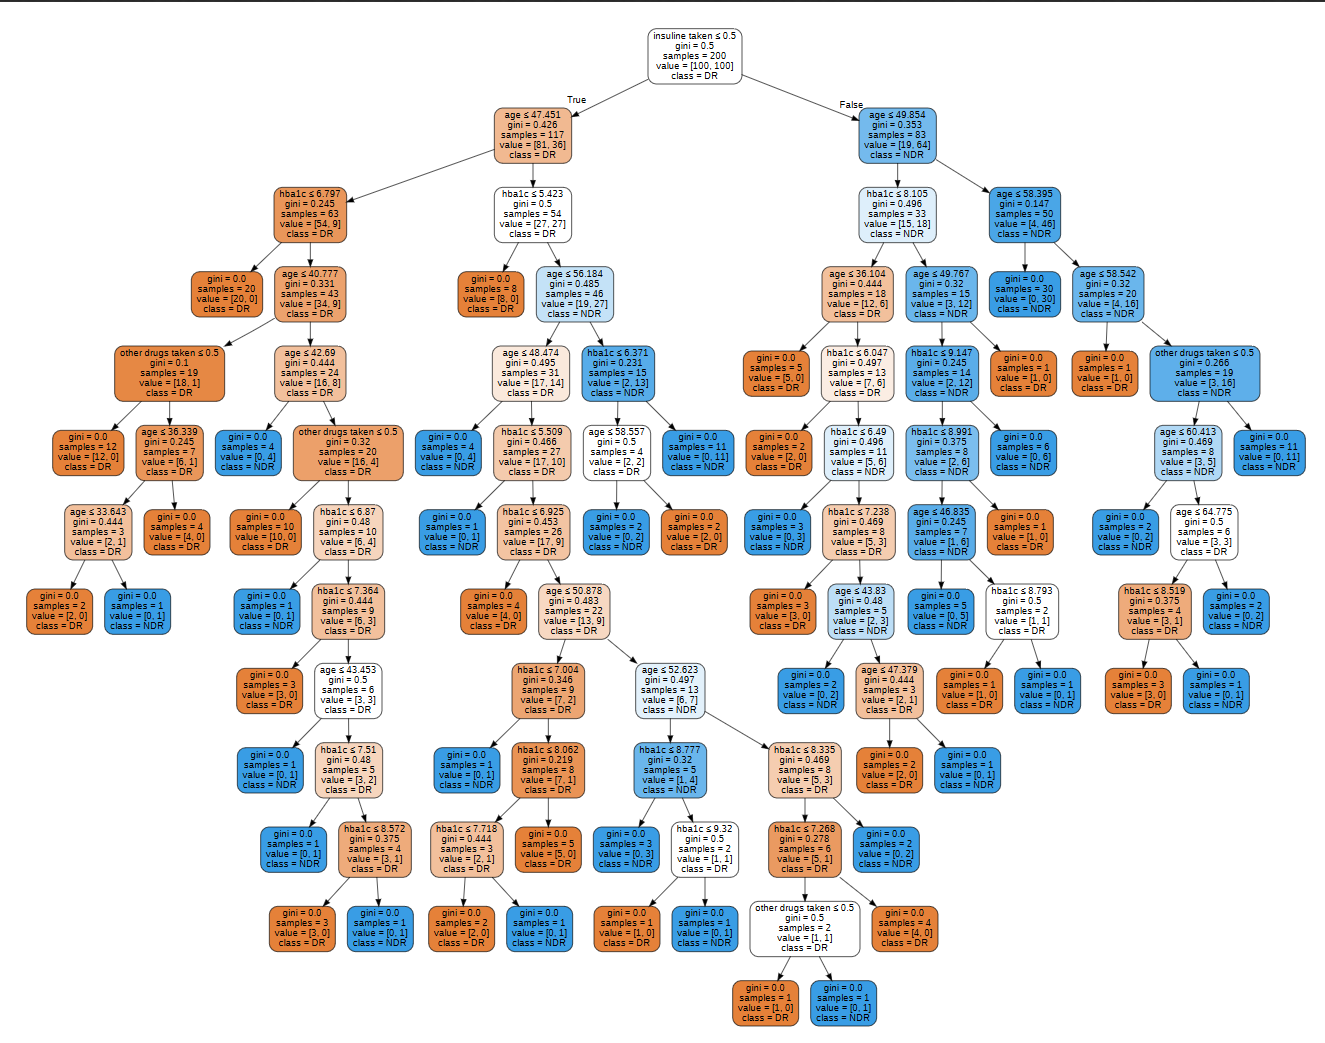

In [0]:
from IPython.display import Image
Image(filename='diab_rem_tree.png',retina=True)

### 2. Random forest

To estimate a model

In [0]:
clf_rf= RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(data_diabetes, classes_diabetes)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

To make prediction with the random forest:

In [0]:
clf_rf.predict(data_diabetes)

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1])

To plot the influence of each variable in the model:

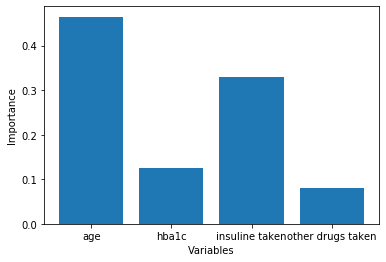

In [0]:
import matplotlib.pyplot as plt
plt.bar(feature_names,clf_rf.feature_importances_)
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.show()

###3.Interpretable Models: comparison with the state-of-the-art clinical score DiaRem
>The DiaRem (Diabetes Remission score) was introduced recently byStill et al., 2013
>For  a  patient,  if  the  sum  of  the  scores  over  all  clinical  variables  is <7,  we  will  classifythis patient as one having the diabetes remission, otherwise, we will put him in the class ofnon-remission.

In [0]:
class DiaRem(object):
  def __init__(self):
    pass
  def scoreFunc(self,v):
    age_score=sum(v[0]>=pd.Series([40,50,60]))
    HbA_score=sum(v[1]>=pd.Series([6.5,7,9]))
    other_drug_score=v[2]*3
    treat_insul_score=v[3]*10
    return age_score+HbA_score+other_drug_score+treat_insul_score
  def scoreCalculater(self,X):
    scores=X.apply(self.scoreFunc,axis=1)
    return scores
    
  
  def predict(self,X):
    labels=self.scoreCalculater(X)>7
    return labels.astype(int)


DiaRem_model=DiaRem()

 Compare the predictive power of the considered models (decision trees, random forest, andthe DiaRem).  What can you conclude?

In [0]:
dtree_preds = clf.predict(data_diabetes)
random_forest_preds = clf_rf.predict(data_diabetes)
DiaRem_prediction = DiaRem_model.predict(data_diabetes)

print("decision tree accuracy score: ", accuracy_score(dtree_preds, classes_diabetes))
print("random forest accuracy score: ", accuracy_score(random_forest_preds, classes_diabetes))
print("DiaRem model  accuracy score: ", accuracy_score(DiaRem_prediction, classes_diabetes))

decision tree accuracy score:  0.82
random forest accuracy score:  0.82
DiaRem model  accuracy score:  0.67
